<a href="https://colab.research.google.com/github/selsaady1/MAT-421-Elsaady/blob/main/Module_C_(Elsaady).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Module C, Chapter 19 Root Finding
## Saif Elsaady
## MAT 421, Febuary 5 2023

In [ ]:
## 19.1 Root Finding Problem Statement

The root of a function goes back to previous factoring methods learned in mathmatics, the root (or zero of a function) is an x_r so that f(x_r) is equal to zero. When it comes to more advanced problems such as f(x) = cos(x) - x we have to take a different approach than if we had to solve for x^2 -5 = f(x).

An example of solving for an advanced problem in python programming is show below:

In [ ]:
#here we attempt to solve for cos(x) - 1 near -3
import numpy as np #libraries
from scipy import optimize #libraries

f = lambda x: np.cos(x) - 1
r = optimize.fsolve(f, -3)
print("r =", r)

# Verify the solution is a root
result = f(r)
print("result=", result)

r = [-4.54483515e-09]
result= [0.]


In [ ]:
## 19.2 Tolerance

Tolerance is the level of error that will be tolerated or accepted in an engineering problem. When a computer program has converged to a specific answer, this means that the computer has found an error that is less than the tolerance which has deemed the solution to be acceptable. With tolerance, being careful with the program is a necessity. We have to note that we want an x_r so that within the accepta

In [ ]:
## 19.3 Bisection Method

The Intermediate Value Theorem states that if f(x) is a continuous function between a & b, and sign(f(a))≠sign(f(b)) then there must be a value (C) such that a<c<b and f(c)=0 . The bisection method uses the intermediate value theorum to find roots

The following process below repeats until the error is within the appropriate tolerance:

Let us says that f(x) is a continuous function & a/b are real&scalar values such that a < b.

According to the intermediate value theorem when f(a) > 0 and f(b) < 0 there must be a root on (a,b).

Let m = (b+a)/2 . If f(m) = 0 or is close within an acceptable range, m is a root of the function.

M is an improvement on the value a & there is a guaranteed root on interval (m,b) if f(m) > 0.

M is an improvement on the value b & there is a guaranteed root on interval (a,m) if f(m) < 0.

If f(m) < 0 , then m is an improvement on right bound , b, and there is a guaranteed root on interval (a,m).


In [ ]:
##The following function below approximates the root of r of f, bounded by a&b & within tolerance.
import numpy as np

def my_bisection(f, a, b, tol): 
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
    m = (a + b)/2    # get midpoint
    if np.abs(f(m)) < tol:         # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)): # case where m is an improvement on a. /// recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)): # case where m is an improvement on b. // Make recursive call with b = m
        return my_bisection(f, a, m, tol)

In this example we check that sqrt of 3 can be computed from the function x^2 -3 = f(x) from a = 0 to b =3. We call the function to check for a tolerance of abs(x)< 0.0001 && abs(x)< 0.001. We also verify by replugging the root back into the original function!

In [ ]:
f = lambda x: x**2 - 3 #function

r1 = my_bisection(f, 0, 3, 0.001)
print("r1 =", r1)
r01 = my_bisection(f, 0, 3, 0.0001)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.732177734375
r01 = 1.7320404052734375
f(r1) = 0.00043970346450805664
f(r01) = -3.603450022637844e-05


In [ ]:
## 19.4 Newton-Raphson Method

Newtons-Raphson method finds roots by iterating newtons steps from x_0 until the error is less than the tolerance. The newton step is shown below:

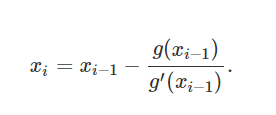

In the example below, √3 is the root of f(x)=x2−3
using x0=1.73 as a starting point. The equation above is used to compute and compare.

In [ ]:
import numpy as np

f = lambda x: x**2 - 3
f_prime = lambda x: 3*x
newton_raphson = 1.73 - (f(1.73))/(f_prime(1.73))

print("newton_raphson =", newton_raphson)
print("sqrt(3) =", np.sqrt(3))

newton_raphson = 1.731368015414258
sqrt(3) = 1.7320508075688772


In [ ]:
##as we can see they are compared above!

The function below gives the an estimation of the root of f, where f=function object f(x),df is a function object to f′(x),x0=initial guess, and tol is the error tolerance. The error measurement should be abs(f(x)).

In [ ]:
def my_newton(f, df, x0, tol):
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)
###here we estimate sqrt 3 within a tolerance of 1e-5 at x0=1.8
estimate = my_newton(f, f_prime, 1.8, 1e-5)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(3))

estimate = 1.7320520260420906
sqrt(2) = 1.7320508075688772


In [ ]:
## 19.5 Root Finding in Python

The function f_solve in python takes the appropriate arguements in and computes the root!

The example problem below is an illsutration of this

In [ ]:
##Computing the root of x^2 -12x+37 using fsolve function
from scipy.optimize import fsolve
f = lambda x: x**3 - 100*x**2 - x + 100
fsolve(f, [2,80])

array([  1., 100.])